# Project: TMDb Movie Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will be analyzing data related to TMDb movie database. In particular, we will be interested in finding trends related to the movie genres that were most popular year on year. Also we will be finding out the kinds of properties that are associated with movies that have high revenues ex: ROI, popularity and vote_average by plotting histogram, scatter plots and bar charts to draw conclusions about the dataset
Note: Due to the data spread across 100 years, for the sake of clearer representation of data on charts and graphs, tail function is used at multiple places

## Questions submitted
>  #### Which genres of movies are most popular from year to year?
>  #### What is the ROI of movies over the years?
>  #### What kinds of properties are associated with movies that have high revenues?

## A description of what you did to investigate those questions


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_movies = pd.read_csv('C:\\Shalin\\Data science\\DAND folders and certification\\projects\\Project 2 - investigate a dataset\\tmdb-movies.csv')
df_movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
#Describe dataset
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
# Assess data to find the # of columns, data type and what columns have null entries
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#Find number of unique values in each column
df_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Data Cleaning (Replace this with more specific notes!)

In [6]:
#Finding out total NaN values in dataset

df_movies.isnull().sum().sum()

13434

In [7]:
#Find total number of null value rows for imdb_id (since that is the unique identifier)
df_movies['imdb_id'].isnull().sum()

#Drop rows with imdb_id columns that have missing values
df_movies['imdb_id'].dropna(inplace=True)

In [8]:
#Identifying missing values (NaN) and replace each NaN value by empty string and assign the updated values to new dataset
df_movies_2= df_movies.replace(np.nan, '', regex=True)

#Validate to see if any NaN values in the cleansed dataset
df_movies_2.isnull().sum().sum()

0

In [9]:
#Note: No need to fix any data type since the dataset has no incorrect datatype issue

In [10]:
#Identifying duplicate data in the dataset
sum(df_movies_2.duplicated())

1

In [11]:
#Drop rows with missing values
df_movies_2.dropna(inplace=True)

In [12]:
#Removing duplicates with duplicate imdb_id  (since imdb_id is a primary key)
df_movies_2.drop_duplicates(inplace=True, subset = 'imdb_id')

#Validating if any more duplicate data present in dataset
sum(df_movies_2.duplicated())

0

In [13]:
#Fixing datatypes -  Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
hb_movies = df_movies_2[df_movies_2['genres'].str.contains('|')]
hb_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [14]:
# create two copies of the dataframe
df_movies_2_1 = hb_movies.copy() 
df_movies_2_2 = hb_movies.copy() 

In [15]:
# Determine the columns to split by '|' and apply split function to 'genre' column of the data set
split_columns = ['genres']

for c in split_columns:
    df_movies_2_1[c] = df_movies_2_1[c].apply(lambda x: x.split("|")[0])
    df_movies_2_2[c] = df_movies_2_2[c].apply(lambda x: x.split("|")[-1])

In [16]:
# Dataframe 1 created to include first genre stated for each record before the split value '|'
df_movies_2_1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [17]:
# Dataframe 2 created to include first genre stated for each record after the split value '|'
df_movies_2_2

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [18]:
#Add the new rows to new dataframe
new_rows = df_movies_2_1.append(df_movies_2_2)

In [19]:
# Display new rows
new_rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [20]:
# drop the original hybrid rows
df_movies_2.drop(hb_movies.index, inplace=True)

In [21]:
# add in our newly separated rows
df_movies_2 = df_movies_2.append(new_rows, ignore_index=True, sort = False)

In [22]:
# save the updated dataset to new csv file for later use
df_movies_2.to_csv('C:\\Shalin\\Data science\\DAND folders and certification\\projects\\Project 2 - investigate a dataset\\tmdb_movies_edited.csv', index=False)


In [23]:
# Check the new dataframe
df_movies_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21712 entries, 0 to 21711
Data columns (total 21 columns):
id                      21712 non-null int64
imdb_id                 21712 non-null object
popularity              21712 non-null float64
budget                  21712 non-null int64
revenue                 21712 non-null int64
original_title          21712 non-null object
cast                    21712 non-null object
homepage                21712 non-null object
director                21712 non-null object
tagline                 21712 non-null object
keywords                21712 non-null object
overview                21712 non-null object
runtime                 21712 non-null int64
genres                  21712 non-null object
production_companies    21712 non-null object
release_date            21712 non-null object
vote_count              21712 non-null int64
vote_average            21712 non-null float64
release_year            21712 non-null int64
budget_adj           

<a id='eda'></a>
## Exploratory Data Analysis


### Which genres of movies are most popular from year to year

In [24]:
#Pull few rows using head funciton to check the genres and release_date columns for later
df_movies_2.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


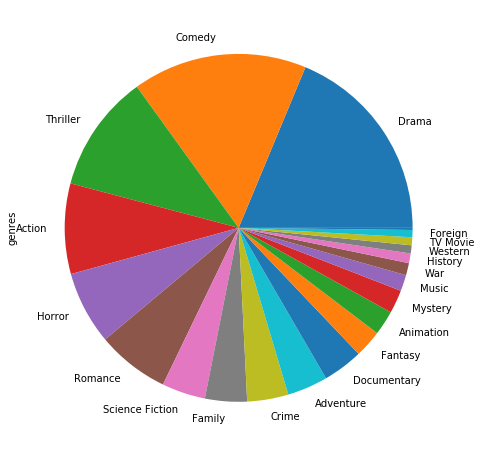

In [25]:
#1D EDA for 'genres' feature - draw pie chart to show distribution of movies by genres 
df_movies_2['genres'].value_counts().plot(kind='pie',figsize=(8,8));

### About the pie chart plot 
Comedy is the most popular genre across all years of dataframe

In [26]:
# 2D EDAfor determining most popular genre year on year
#Split release date column into year and month columns
df_movies_2['release_date'] = pd.to_datetime(df_movies_2['release_date'])
df_movies_2['month'] =  df_movies_2['release_date'].dt.month
df_movies_2['year'] = df_movies_2['release_date'].dt.year 
df_movies_2 = df_movies_2.drop(['release_date'], axis=1)

In [27]:
df_movies_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21712 entries, 0 to 21711
Data columns (total 22 columns):
id                      21712 non-null int64
imdb_id                 21712 non-null object
popularity              21712 non-null float64
budget                  21712 non-null int64
revenue                 21712 non-null int64
original_title          21712 non-null object
cast                    21712 non-null object
homepage                21712 non-null object
director                21712 non-null object
tagline                 21712 non-null object
keywords                21712 non-null object
overview                21712 non-null object
runtime                 21712 non-null int64
genres                  21712 non-null object
production_companies    21712 non-null object
vote_count              21712 non-null int64
vote_average            21712 non-null float64
release_year            21712 non-null int64
budget_adj              21712 non-null float64
revenue_adj         

In [28]:
#Write updated dataframe to csv file
df_movies_2.to_csv('C:\\Shalin\\Data science\\DAND folders and certification\\projects\\Project 2 - investigate a dataset\\tmdb_edited_yeardateformatted.csv', index=False)

In [29]:
# Check the dataframe to see records after splitting multiple genre entries into single genre entry

df_movies_2.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,6,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,5,2015


In [30]:
#Create a table to show the most popular genre by year based on the average popularity index
popular_genre = df_movies_2.groupby('year')[['genres','popularity']].max()

#View the list of genres with max popularity over each year (total - 100 years)
popular_genre.tail(100)
#popular_genre = df_movies_2.apply(lambda x: x.sort_values(axis = 0, ascending = False, inplace = False))

,genres,popularity
year,,
1969,Western,1.778746
1970,Western,1.936962
1971,Western,3.072555
1972,Western,5.738034
1973,Western,2.272486
1974,Western,3.264571
1975,Western,3.258151
1976,Western,2.582657
1977,Western,12.037933


### About the table 
Western movies are the most popular when it comes to popularity rating year on year for the dataset pulled, followed by War


Text(0, 0.5, 'Popularity')

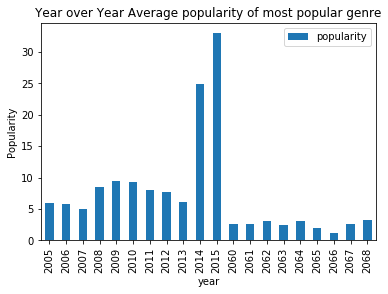

In [52]:
# Plot bar chart to display the max voter_average rating year on year 
plt.rcParams.update({'figure.max_open_warning': 0})
df_movies_2.groupby('year')[['genres','popularity']].max().tail(20).plot(kind='bar', title = 'Year over Year Average popularity of most popular genre').set_ylabel('Popularity')

### About the bar plot 
Release years - 2014 and 2015 were years that saw highest max popularity rating for movies for a specific genre - which were 'Western' movie genres

In [32]:
# Calcualte mean popularity to show distribution of movie counts by different features of dataframe
df_movies_2['popularity'].mean()

0.6467828330876951

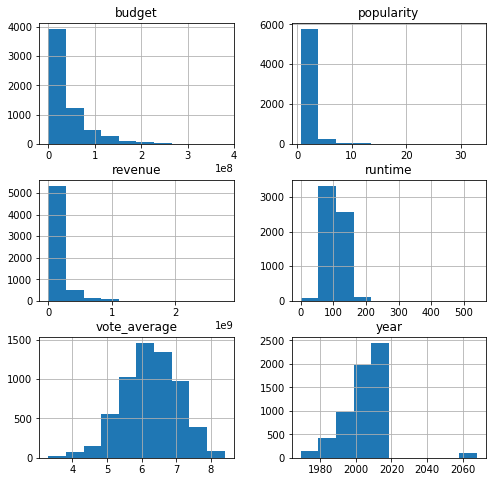

In [33]:
# Histogram to represent count of movies with high popularity correlated with specific features- greater than 0.65 i.e mean popularity
df_popular_genres_high = df_movies_2[df_movies_2['popularity'] >0.65][['popularity', 'budget', 'revenue', 'year','vote_average','runtime']]

df_popular_genres_high.hist(figsize=(8,8));

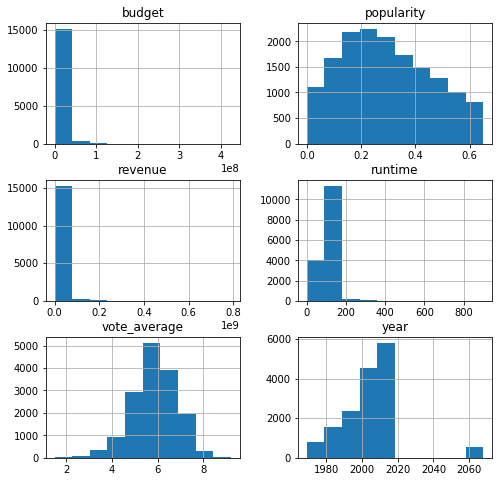

In [34]:
# Histogram to represent count of movies with low popularity  correlated with specific features- greater than 0.65 i.e mean popularity
df_popular_genres_low = df_movies_2[df_movies_2['popularity'] <=0.65][['popularity', 'budget', 'revenue', 'year','vote_average','runtime']]

df_popular_genres_low.hist(figsize=(8,8));

### About the histogram plot
**Movies split into 2 categories** - 1 - with higher popularity - greater than 0.65 popularity index, 2 - 2ith lower popularity - less than or equal to 0.65 popularity index, where mean popularity index = 0.65

The above histograms show the spread of movie data by featues such as 1)budget 2) popularity 3) revenue 4) runtime 5) vote_average 6) year
for both dataframes split by popularity index

Few conclusions for high popularity movies by features
**Popularity** - Very few movies with popularity index in double digits, which is also conclusive of the fact that the mean popularity is 0.65, making data for high popularity index movies right skewed where mean is greater than median

**Vote average** - Vote average is pretty consistent on the scale of 0-10, with the distribution quite normalized

**Runtime** - Very few movies with runtime > 150, making the spread of runtime histogram right skewed where mean is greater than median

**Revenue** - Not many movies with >100 million dollar revenue

In [35]:
# count of movies with high popularity(> 0.65)
df_popular_genres_high['popularity'].count()

6084

In [36]:
# count of movies with low popularity (<0.65)
df_popular_genres_low['popularity'].count()

15628

### About the count 
The average popularity rating was 0.65. Movies will low popularity rating (count - 15628) (< 0.65 in popularity index) were higher than movies with high popularity rating (count - 6084)(>0.65 in popularity index) 

### What is the ROI of movies over the years?

In [37]:
# Plot bar chart showing correlation of different features within the dataframe with revenue

#Find number of duplicates in the dataframe
sum(df_movies_2.duplicated())

#Drop rows with all zeros in pandas data frame
df_movies_2['budget'] = df_movies_2['budget'].replace(0, np.nan)
#print(df_movies_2['budget'])

#Drop rows with NaN values to avoid any div by zero error
df_movies_2.dropna(inplace=True)

#Remove duplicates for future use
df_movies_2.drop_duplicates(inplace=True) 

In [38]:
#Calculate the ROI(Return on investment)/profitability of a movie by dividing revenue/budget
revenue_amount = df_movies_2['revenue']
budget_amount = df_movies_2['budget']
ROI = revenue_amount/budget_amount

#Creaet a new column called ROI based on the calculation of revenue/ budget
df_movies_2['ROI'] = ROI

#Check the dataframe to see if NaN values
df_movies_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9451 entries, 0 to 21701
Data columns (total 23 columns):
id                      9451 non-null int64
imdb_id                 9451 non-null object
popularity              9451 non-null float64
budget                  9451 non-null float64
revenue                 9451 non-null int64
original_title          9451 non-null object
cast                    9451 non-null object
homepage                9451 non-null object
director                9451 non-null object
tagline                 9451 non-null object
keywords                9451 non-null object
overview                9451 non-null object
runtime                 9451 non-null int64
genres                  9451 non-null object
production_companies    9451 non-null object
vote_count              9451 non-null int64
vote_average            9451 non-null float64
release_year            9451 non-null int64
budget_adj              9451 non-null float64
revenue_adj             9451 non-null 

In [39]:
# Fill nAN values for ROI with mean values
mean = df_movies_2['ROI'].mean()

#Check the new dataframe after replacement of NaN revenue values with mean values
df_movies_2['ROI'] = df_movies_2['ROI'].fillna(mean)

#Confirm if any more NaN values in ROI column
df_movies_2['ROI'].isnull().sum()

#See the dataframe information after replacing NaN values with mean value
df_movies_2.info()

#print(df_movies_2['ROI'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9451 entries, 0 to 21701
Data columns (total 23 columns):
id                      9451 non-null int64
imdb_id                 9451 non-null object
popularity              9451 non-null float64
budget                  9451 non-null float64
revenue                 9451 non-null int64
original_title          9451 non-null object
cast                    9451 non-null object
homepage                9451 non-null object
director                9451 non-null object
tagline                 9451 non-null object
keywords                9451 non-null object
overview                9451 non-null object
runtime                 9451 non-null int64
genres                  9451 non-null object
production_companies    9451 non-null object
vote_count              9451 non-null int64
vote_average            9451 non-null float64
release_year            9451 non-null int64
budget_adj              9451 non-null float64
revenue_adj             9451 non-null 

In [40]:
df_movies_2['ROI'] = df_movies_2['ROI'].round(0).astype(int)
#df_movies_2['ROI'] = df_movies_2[pd.to_numeric(df_movies_2['ROI'], errors='coerce').notnull()]['ROI']

#Check info the the dataframe after datatype conversion
df_movies_2.info(memory_usage='deep')

#Now check the rows using head function
df_movies_2.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9451 entries, 0 to 21701
Data columns (total 23 columns):
id                      9451 non-null int64
imdb_id                 9451 non-null object
popularity              9451 non-null float64
budget                  9451 non-null float64
revenue                 9451 non-null int64
original_title          9451 non-null object
cast                    9451 non-null object
homepage                9451 non-null object
director                9451 non-null object
tagline                 9451 non-null object
keywords                9451 non-null object
overview                9451 non-null object
runtime                 9451 non-null int64
genres                  9451 non-null object
production_companies    9451 non-null object
vote_count              9451 non-null int64
vote_average            9451 non-null float64
release_year            9451 non-null int64
budget_adj              9451 non-null float64
revenue_adj             9451 non-null 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,year,ROI
0,135397,tt0369610,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,6,2015,10
1,76341,tt1392190,28.419936,150000000.0,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,5,2015,3


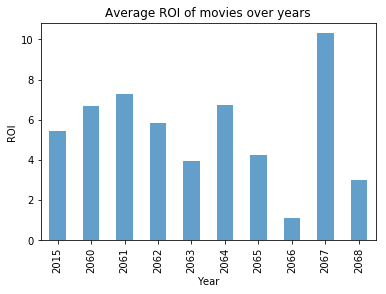

In [41]:
#Plot bar chart with mean ROI of movies year on year
#colors = ['red','green']
color_means = df_movies_2.groupby('year').mean().tail(10)['ROI']
color_means.plot(kind = 'bar', title = 'Average ROI of movies over years',alpha = .7)
plt.xlabel("Year")
plt.ylabel("ROI");

### About the bar chart plot
ROI Calcualted as a percentage of revenue over budget is highest in 2067 (Release year) and lowest in 2066 (Release year) for the dataset pulled using tail function (Release year - 2015 and later)

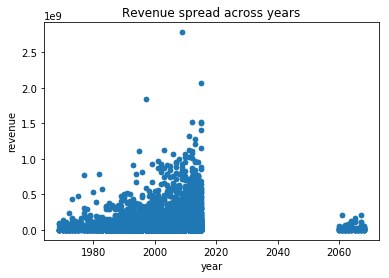

In [49]:
#Plot a scatter plot to see the spread of revenue data over the years
df_movies_2.plot(x = 'year', y = 'revenue', kind = 'scatter', title = 'Revenue spread across years')

### About the scatterplot
The revenue of high revenue generating movies was  linear distributed from the start 1968 to 2015 (release years). Post 2060, the revenue of movies is on a linear distribution too

No movie data from 2016-2059

### What kinds of properties are associated with movies that have high revenues?

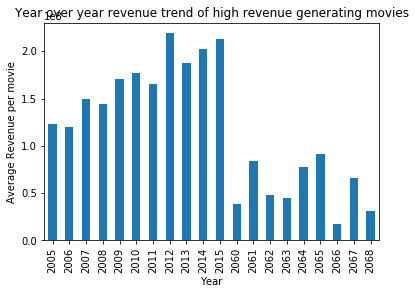

In [54]:
# Create a dataframe with high revenue generating movies (> 10M dollars)
df_movies_high = df_movies_2[df_movies_2['revenue']>10000000][['popularity', 'budget', 'revenue','genres', 'year','ROI','vote_average','runtime']]

#Group the high budget movies by mean revenue for that year and plot a bar chart
df_movies_high.groupby('year')['revenue'].mean().tail(20).plot(kind='bar')
plt.title("Year over year revenue trend of high revenue generating movies")
plt.xlabel("Year")
plt.ylabel("Average Revenue per movie");


### About the bar chart plot
Count of movies with revenue > 10M dollars (high revenue generating movies) - count :6429 is less (almost half) than the ones with > 10M dollars (low revenue generating movies) - count: 12956 

Average revenue of high revenue generating movies was highest in 2012 (release year), followed by 2015..2066 saw the least average revenue for that any year pulled from the dataframe

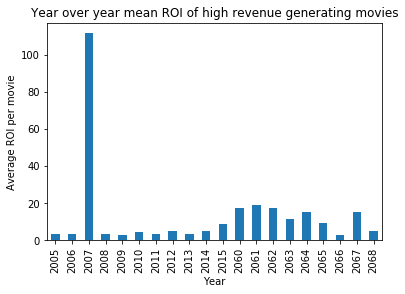

In [51]:
#Group the high revenue movies year on year by mean revenue for that year and plot a bar chart

df_movies_high.groupby('year')['ROI'].mean().tail(20).plot(kind='bar').set_ylabel('Average ROI')
plt.title("Year over year mean ROI of high revenue generating movies")
plt.xlabel("Year")
plt.ylabel("Average ROI per movie");


### About the Bar chart plot
Mean ROI for high budget movies was the maximum in year 2007 (significantly higher than other years)


In [45]:
#Count of movies with high revenues - greater than 10M $
df_movies_high['revenue'].count()

5655

In [46]:
#Count of movies with high revenues - greater than 10M $
df_movies_low = df_movies_2[df_movies_2['revenue']<=10000000][['popularity', 'budget', 'revenue','genres', 'year','vote_average','runtime']]

df_movies_low['revenue'].count()

3796

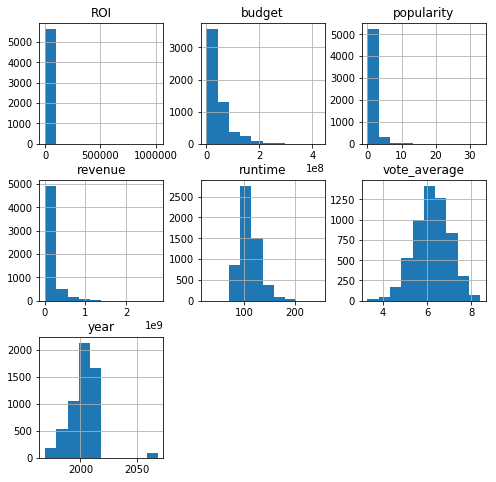

In [47]:
#Get histogram of high revenue movies
df_movies_high.hist(figsize=(8,8));


Text(0, 0.5, 'Average Popularity and Vote average for High revenue movies')

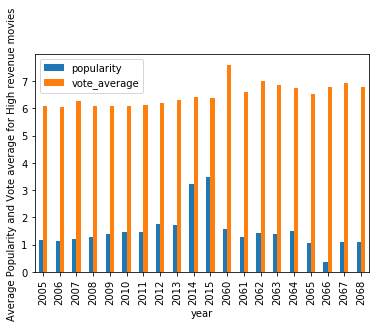

In [48]:
# Year on Year average of popularity of movies
df_movies_high.groupby('year')[['popularity','vote_average']].mean().tail(20).plot(kind='bar').set_ylabel('Average Popularity and Vote average for High revenue movies')

<a id='conclusions'></a>
## Conclusions

### Conclusions
#### Popularity by genres
1) Western movies are the most popular when it comes to popularity rating year on year for the dataset pulled, followed by War

2) Release years - 2014 and 2015 were years that saw highest max popularity rating for movies for a specific genre - which were 'Western' movie genres

3) The average popularity rating was 0.65. Movies will low popularity rating (count - 15628) (< 0.65 in popularity index) were higher than movies with high popularity rating (count - 6084)(>0.65 in popularity index) 

4) No movie data from 2016-2059

#### High Revenue movie data analysis
1) Count of movies with revenue > 10M dollars (high revenue generating movies) - count :6429 is less (almost half) than the ones with > 10M dollars (low revenue generating movies) - count: 12956 

2) The revenue of high revenue generating movies was  linear distributed from the start 1968 to 2015 (release years). Post 2060, the revenue of movies is on a linear distribution too

3) Average revenue of high revenue generating movies was highest in 2012 (release year), followed by 2015..2066 saw the least average revenue for that any year pulled from the dataframe

4) 2060 release year saw the highest vote average (user average rating out of 10) for high revenue generating movies

#### ROI data analysis
1) ROI Calcualted as a percentage of revenue over budget is highest in 2067 (Release year) and lowest in 2066 (Release year) for the dataset pulled using tail function (Release year - 2015 and later)

2) Mean ROI for high budget movies was the maximum in year 2007 (significantly higher than other years)

### Limitations of dataset

1) NaN values in dataset that required cleansing - in certain cases 
a) drop.na for ex: dropping values where primary key column had NaN values 
b) replace - NaN with empty string in case of non primary key columns that had no value even if dropped 
c) fillNa(mean) - in case of 'ROI' column - which was numeric 

2) Duplicate values in dataset that required cleansing 

3) Conversion of float values to int for the sake of plotting a chart ex: ROI value had to be converted from float64 to int

4) Fixing datatypes - Certain columns namely 'genres' that was primarily used for EDA on this dataframe had values separated by pipe (|) characters.Challenge was to split them by delimiter and add the new rows to new dataframe

5) For ROI calculations, budget column was to be divived by revenue column. Budget had 0 values in many rows, leading to div by zero error. Challenge was to remove such rows
